In [6]:
from sympy import symbols, Matrix, eye, simplify
from sympy import latex
from IPython.display import display, Math

# Define symbols
dt, k_re, mass, u = symbols('dt k_re mass u_in')

A21 = symbols('A21')  # Element of matrix A
B2 = symbols('B2')  # Element of matrix B
P11, P12, P21, P22 = symbols('P11 P12 P21 P22')  # Elements of covariance matrix P
P11_sim, P12_sim, P21_sim, P22_sim = symbols('P_pred11 P_pred12 P_pred21 P_pred22')  # Simulated covariance matrix elements
Q11, Q22 = symbols('Q11 Q22')  # Elements of process noise covariance matrix Q
R_mea = symbols('R_mea')  # Measurement noise covariance (scalar)

x_pred, vx_pred = symbols('x_pred vx_pred')  # Predicted state variables
y_mea, y_meaUD = symbols('y_mea y_meaUD')  # Measurement variable
x_step, vx_step = symbols('x_step vx_step')  # relative update
# System matrices
A = Matrix([[1, dt], 
            [A21, 1]])
B = Matrix([[0], [B2]])
C = Matrix([[1, 0]])
x_pred_vector = Matrix([[x_pred], [vx_pred]])

# Prediction step (before jumping)
x_temp = A * x_pred_vector + B * u  # Predicted state vector
x_temp[0] += x_step  
P_pred = A * Matrix([[P11, P12], [P21, P22]]) * A.T + Matrix([[Q11, 0], [0, Q22]])
jumping_step = Matrix([[x_step], [vx_step]])

# Measurement step(after jumping)
# Calculate Kalman gain
S = (C * P_pred * C.T)[0, 0] + R_mea  # Extract scalar from 1x1 matrix and add R
S_sim = symbols('S')  # Measurement prediction covariance
# K = P_pred * C.T / S  # 2x1 vector

# Joseph form update
x_temp_sim_11, x_temp_sim_12 = symbols('x_temp1 x_temp2')
x_temp_sim = Matrix([[x_temp_sim_11], [x_temp_sim_12]])
K1, K2 = symbols('K1 K2')  # Kalman gain components
# K = Matrix([[P11_sim/S_sim], [P21_sim/S_sim]])
K = Matrix([[K1], [K2]])
P_pred_sim = Matrix([[P11_sim, P12_sim], [P21_sim, P22_sim]])

I = eye(2)
IKC = I - K * C
P_update = IKC * P_pred_sim * IKC.T + K * R_mea * K.T

# compute update state vector
x_update = x_temp_sim + K * (y_meaUD - (C * (x_temp_sim))[0, 0])
x_update[1] += jumping_step[1]

# Simplify expressions
# Simplify all key expressions
x_temp_s = simplify(x_temp)
P_pred_s = simplify(P_pred)
S_s = simplify(S)
K_s = simplify(K)
P_update_s = simplify(P_update)
x_update_s = simplify(x_update)

# Display results in LaTeX
display(Math(r"x_{\text{temp}}: " + latex(x_temp_s)))
display(Math(r"P_{\text{pred}}: " + latex(P_pred_s)))
display(Math(r"S: " + latex(S_s)))
display(Math(r"K: " + latex(K_s)))
display(Math(r"P_{\text{update}}: " + latex(P_update_s)))
display(Math(r"x_{\text{update}}: " + latex(x_update_s)))
print("x_temp:", x_temp_s)
print("P_pred:", P_pred_s)
print("S:", S_s)
print("K:", K_s)
print("P_update:", P_update_s)
print("x_update:", x_update_s)






<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

x_temp: Matrix([[dt*vx_pred + x_pred + x_step], [A21*x_pred + B2*u_in + vx_pred]])
P_pred: Matrix([[P11 + P21*dt + Q11 + dt*(P12 + P22*dt), A21*(P11 + P21*dt) + P12 + P22*dt], [A21*P11 + P21 + dt*(A21*P12 + P22), A21*P12 + A21*(A21*P11 + P21) + P22 + Q22]])
S: P11 + P21*dt + Q11 + R_mea + dt*(P12 + P22*dt)
K: Matrix([[K1], [K2]])
P_update: Matrix([[K1**2*R_mea + P_pred11*(K1 - 1)**2, K1*K2*R_mea + K2*P_pred11*(K1 - 1) - P_pred12*(K1 - 1)], [K1*K2*R_mea + (K1 - 1)*(K2*P_pred11 - P_pred21), K2**2*R_mea - K2*P_pred12 + K2*(K2*P_pred11 - P_pred21) + P_pred22]])
x_update: Matrix([[-K1*(x_temp1 - y_meaUD) + x_temp1], [-K2*(x_temp1 - y_meaUD) + vx_step + x_temp2]])


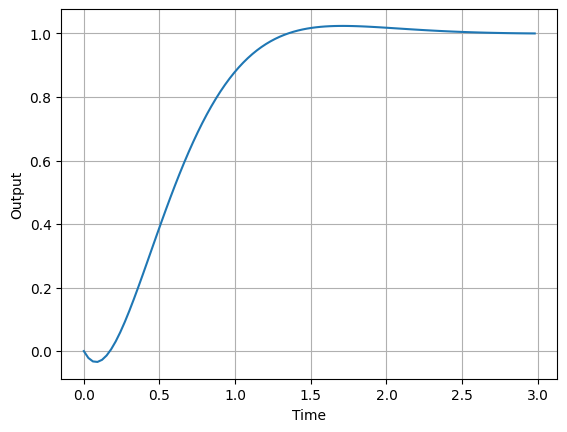

In [5]:
import control
import matplotlib.pyplot as plt

# Define transfer function
num = [-0.1, 1]  # -s + 1
den = [0.11, .51, 1]  # s^2 + s + 1
G = control.TransferFunction(num, den)

# Compute step response
t, y = control.step_response(G)

# Plot
plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Output')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import control
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Simulated or measured step response data (replace with your data)
t = np.linspace(0, 10, 1000)  # Time vector
y_measured = ...  # Your step response data (e.g., from experiment)

# Model step response
def model_step_response(params, t):
    a, c, d = params
    num = [-a, d]  # -as + d
    den = [1, c, d]  # s^2 + cs + d
    sys = control.TransferFunction(num, den)
    t_out, y_out = control.step_response(sys, T=t)
    return y_out

# Cost function
def cost(params, t, y_measured):
    y_model = model_step_response(params, t)
    return np.sum((y_measured - y_model) ** 2)

# Initial guess for parameters [a, c, d]
initial_guess = [1.0, 1.0, 1.0]
# Optimize
result = minimize(cost, initial_guess, args=(t, y_measured), method='Nelder-Mead')
a_opt, c_opt, d_opt = result.x

# Simulate the fitted model
sys_opt = control.TransferFunction([-a_opt, d_opt], [1, c_opt, d_opt])
t_out, y_opt = control.step_response(sys_opt, T=t)

# Plot
plt.plot(t, y_measured, 'b-', label='Measured')
plt.plot(t_out, y_opt, 'r--', label='Fitted Model')
plt.xlabel('Time')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()

print(f"Fitted parameters: a={a_opt:.3f}, c={c_opt:.3f}, d={d_opt:.3f}")
print(f"Transfer function: G(s) = (-{a_opt:.3f}s + {d_opt:.3f}) / (s^2 + {c_opt:.3f}s + {d_opt:.3f})")

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Example data: list of datasets, each with x_t, drift_y_t, y0, x0
datasets = [
    {'x_t': np.array([...]), 'drift_y_t': np.array([...]), 'y0': 1.0, 'x0': 0.0},
    {'x_t': np.array([...]), 'drift_y_t': np.array([...]), 'y0': 2.0, 'x0': 0.0},
    # ... more datasets
]

# Step 1: Estimate alpha(x0, y0) and beta(x0, y0) for each dataset
x0_list = []
y0_list = []
alpha_list = []
beta_list = []
for data in datasets:
    x_t, drift_y_t, y0, x0 = data['x_t'], data['drift_y_t'], data['y0'], data['x0']
    # Prepare data for linear regression: drift_y(t) = alpha * (x(t) - x0) + beta
    X = (x_t - x0).reshape(-1, 1)  # Independent variable: x(t) - x0
    y = drift_y_t.reshape(-1, 1)   # Dependent variable: drift_y(t)
    reg = LinearRegression(fit_intercept=True).fit(X, y)
    alpha = reg.coef_[0, 0]  # Slope: alpha(x0, y0)
    beta = reg.intercept_[0] # Intercept: beta(x0, y0)
    x0_list.append(x0)
    y0_list.append(y0)
    alpha_list.append(alpha)
    beta_list.append(beta)

# Step 2: Fit 2D polynomial surfaces to alpha(x0, y0) and beta(x0, y0)
degree = 2  # Polynomial degree for x0 and y0
poly = PolynomialFeatures(degree)
X_features = np.array([x0_list, y0_list]).T  # Shape: (n_datasets, 2)
X_poly = poly.fit_transform(X_features)  # Polynomial features for [x0, y0]

# Fit alpha(x0, y0)
reg_alpha = LinearRegression().fit(X_poly, alpha_list)
# Fit beta(x0, y0)
reg_beta = LinearRegression().fit(X_poly, beta_list)

# Step 3: Predict alpha and beta for new (x0, y0) pairs
x0_new = np.array([0.0, 0.5])  # Example new x0 values
y0_new = np.array([1.5, 2.5])  # Example new y0 values
new_pairs = np.array([x0_new, y0_new]).T  # Shape: (n_new, 2)
new_pairs_poly = poly.transform(new_pairs)  # Polynomial features for new pairs

alpha_pred = reg_alpha.predict(new_pairs_poly)
beta_pred = reg_beta.predict(new_pairs_poly)

print("Predicted alpha(x0, y0):", alpha_pred)
print("Predicted beta(x0, y0):", beta_pred)

# Optional: Predict drift_y for a new dataset
# Example: Predict drift_y(t) for a new dataset with x0_new[0], y0_new[0], and some x_t_new
x_t_new = np.array([...])  # New time-varying x(t)
drift_y_pred = alpha_pred[0] * (x_t_new - x0_new[0]) + beta_pred[0]
print("Predicted drift_y(t):", drift_y_pred)

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import pwlf

# Example data: list of datasets, each with x_t, drift_y_t, y0, x0
datasets = [
    {'x_t': np.array([...]), 'drift_y_t': np.array([...]), 'y0': 1.0, 'x0': 0.0},
    {'x_t': np.array([...]), 'drift_y_t': np.array([...]), 'y0': 2.0, 'x0': 0.0},
    # ... more datasets
]

# Step 1: Estimate alpha(x0, y0), beta(x0, y0), and Y_max(x0, y0) for each dataset
x0_list = []
y0_list = []
alpha_list = []
beta_list = []
Y_max_list = []
has_Y_max = []  # Track which datasets have Y_max defined

for data in datasets:
    x_t, drift_y_t, y0, x0 = data['x_t'], data['drift_y_t'], data['y0'], data['x0']
    
    # Use pwlf for piecewise linear regression with one breakpoint
    model = pwlf.PiecewiseLinFit(x_t - x0, drift_y_t)  # Work in x(t) - x0 space
    model.fit(2, loss='huber')  # Use Huber loss for robustness to noise
    
    breakpoints = model.fit_breaks  # Breakpoint in x(t) - x0 space
    slopes = model.slopes
    intercepts = model.intercepts
    
    # Extract alpha, beta, and Y_max
    alpha = slopes[0]  # Slope of first segment
    beta = intercepts[0]  # Intercept of first segment
    
    # Check if second segment is constant (slope near zero) and within data range
    x_t1 = breakpoints[1] + x0  # Convert breakpoint back to x(t) space
    if (abs(slopes[1]) < 1e-3 and  # Second segment has near-zero slope (constant)
        x_t1 <= max(x_t) and x_t1 >= min(x_t)):  # Breakpoint within data range
        Y_max = intercepts[1]  # Y_max is intercept of second segment
        has_Y_max.append(True)
    else:
        Y_max = None  # No constant region detected
        has_Y_max.append(False)
    
    x0_list.append(x0)
    y0_list.append(y0)
    alpha_list.append(alpha)
    beta_list.append(beta)
    Y_max_list.append(Y_max)

# Step 2: Fit 2D polynomial surfaces to alpha(x0, y0), beta(x0, y0), and Y_max(x0, y0)
degree = 2
poly = PolynomialFeatures(degree)
X_features = np.array([x0_list, y0_list]).T  # Shape: (n_datasets, 2)
X_poly = poly.fit_transform(X_features)

# Fit alpha(x0, y0)
reg_alpha = LinearRegression().fit(X_poly, alpha_list)
# Fit beta(x0, y0)
reg_beta = LinearRegression().fit(X_poly, beta_list)
# Fit Y_max(x0, y0) only for datasets with Y_max
if any(has_Y_max):
    X_poly_Y_max = X_poly[np.array(has_Y_max)]
    Y_max_valid = np.array([y for y, valid in zip(Y_max_list, has_Y_max) if valid])
    reg_Y_max = LinearRegression().fit(X_poly_Y_max, Y_max_valid)
else:
    reg_Y_max = None

# Step 3: Predict alpha, beta, and Y_max for new (x0, y0) pairs
x0_new = np.array([0.0, 0.5])  # Example new x0 values
y0_new = np.array([1.5, 2.5])  # Example new y0 values
new_pairs = np.array([x0_new, y0_new]).T  # Shape: (n_new, 2)
new_pairs_poly = poly.transform(new_pairs)

alpha_pred = reg_alpha.predict(new_pairs_poly)
beta_pred = reg_beta.predict(new_pairs_poly)
print("Predicted alpha(x0, y0):", alpha_pred)
print("Predicted beta(x0, y0):", beta_pred)

if reg_Y_max is not None:
    Y_max_pred = reg_Y_max.predict(new_pairs_poly)
    print("Predicted Y_max(x0, y0):", Y_max_pred)
else:
    print("No Y_max model fitted (no datasets reached threshold)")

# Optional: Predict drift_y for a new dataset
x_t_new = np.array([...])  # New time-varying x(t)
if reg_Y_max is not None:
    # For prediction, x(t1) must be provided or estimated
    x_t1_new = ...  # Placeholder: need to define x(t1) for new data
    drift_y_pred = np.where(
        x_t_new < x_t1_new,
        alpha_pred[0] * (x_t_new - x0_new[0]) + beta_pred[0],
        Y_max_pred[0]
    )
else:
    # No threshold, use linear model only
    drift_y_pred = alpha_pred[0] * (x_t_new - x0_new[0]) + beta_pred[0]
print("Predicted drift_y(t):", drift_y_pred)